In [1]:
import numpy as np
import pandas as pd
import gudhi as gd  
from sklearn import manifold
from pylab import *
import sklearn_tda
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
my_data = np.recfromcsv('./InteractiveJPDwB/data/seed1_data.csv', delimiter=',')
my_data = [[i[1],i[2]] for i in my_data]

In [3]:
import gudhi
rips_complex = gudhi.RipsComplex(points=my_data)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)

Rips complex is of dimension 2 - 166750 simplices - 100 vertices.


In [4]:
BarCodes_Rips0 = simplex_tree.persistence()
BarCodes_Rips0 = list(filter(lambda BettiNum: BettiNum[0] == 1, BarCodes_Rips0))

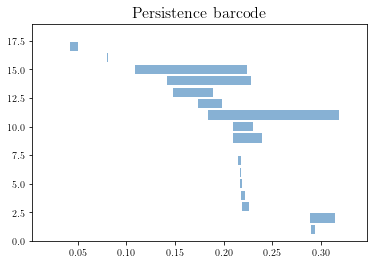

In [5]:
gudhi.plot_persistence_barcode(BarCodes_Rips0)

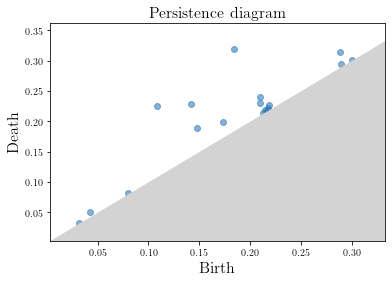

In [6]:
gudhi.plot_persistence_diagram(BarCodes_Rips0)

In [ ]:
xd, yd = [i[0] for i in my_data], [i[1] for i in my_data]
plot(xd, yd, 'o')

In [ ]:
print("#####################################################################")
print("RipsComplex creation from points")
rips = gudhi.RipsComplex(points=my_data)

simplex_tree = rips.create_simplex_tree(max_dimension=2)

diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)

gudhi.plot_persistence_diagram(diag)
plot.show()

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from gudhi.point_cloud.dtm import DistanceToMeasure
from gudhi.weighted_rips_complex import WeightedRipsComplex
from gudhi import plot_persistence_barcode
pts = my_data
dist = cdist(pts,pts)
dtm = DistanceToMeasure(2, q=2, metric="precomputed")
r = dtm.fit_transform(dist)
w_rips = WeightedRipsComplex(distance_matrix=dist, weights=r)
st = w_rips.create_simplex_tree(max_dimension=2)
plot_persistence_barcode(st.persistence())

In [ ]:
points = pts
rc = w_rips

# We are only going to plot the triangles
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0])==3])

print(pts, triangles)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], [0,0,0], triangles=triangles)
plt.show()

In [ ]:

# Import the class
import kmapper as km

# Some sample data
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=km.Cover(n_cubes=10))

# Visualize it
#mapper.visualize(graph, path_html="make_circles_keplermapper_output.html",
#                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

In [ ]:
from simplicial import *

c = SimplicialComplex()

In [ ]:
# add a simplex with a generated name
s1 = c.addSimplex()

# add simplices whose names we want to specify
s2 = c.addSimplex(id = 2)
s3 = c.addSimplex(id = 3)

In [ ]:
l23 = c.addSimplex(fs = [ 2, 3 ])

In [ ]:
l12 = c.addSimplex(fs = [ s1, 2 ])
l31 = c.addSimplex(fs = [ s1, 3 ])

# create the triangle
t123 = c.addSimplex(fs = [l12, l23, l31])

In [ ]:
txyz = c.addSimplexOfOrder(2, id = 'xyz')

In [ ]:
import simplicial as simplicial

In [ ]:
help(c)

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 21 06:03:32 2018
@author: nolte
D. D. Nolte, Introduction to Modern Dynamics: Chaos, Networks, Space and Time, 2nd ed. (Oxford,2019)
"""
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from matplotlib import pyplot as plt
from matplotlib import cm
import time
import os
 
plt.close('all')
 
# model_case 1 = Pendulum
# model_case 2 = Double Well
print(' ')
print('Duffing.py')
 
alpha = 1
beta = 1
delta = 0.3
gam = 0.35
w = 1.2


def flow_deriv(x_y_z,tspan):
    x, y, z = x_y_z
    a = y
    b = delta*np.cos(w*tspan) - alpha*x - beta*x**3 - gam*y
    c = w
    return[a,b,c]
                 
T = 2*np.pi/w
 
px1 = 0 # np.random.rand(1)
xp1 = 0 # np.random.rand(1)
w1 = 0
 
x_y_z = [xp1, px1, w1]
 
# Settle-down Solve for the trajectories
t = np.linspace(0, 2000, 40000)
x_t = integrate.odeint(flow_deriv, x_y_z, t)
x0 = x_t[39999,0:3]
 
tspan = np.linspace(1,2000,40000)
x_t = integrate.odeint(flow_deriv, x0, tspan)
siztmp = np.shape(x_t)
siz = siztmp[0]
 
y1 = x_t[:,0]
y2 = x_t[:,1]
y3 = x_t[:,2]
     
plt.figure(2)
lines = plt.plot(y1[1:2000],y2[1:2000],'ko',ms=1)
plt.setp(lines, linewidth=0.5)
plt.show()
plt.savefig('Duffing')

In [ ]:
import pandas as pd 
xx = lambda a: np.interp(a, (a.min(), a.max()), (0, +1))
ll = xx(y1[1:150])
la = xx(y2[1:150])
pd.DataFrame(np.array(list(zip(ll,la)))).to_csv("./InteractiveJPDwB/data/seed1_data.csv", header=['X_value','Y_value'], index=True, index_label='point_id')


In [ ]:
plt.figure(2)
xx = lambda a: np.interp(a, (a.min(), a.max()), (0, +1))
ll = xx(y1[1:500])
la = xx(y2[1:500])
lines = plt.plot(ll,la,'ko',ms=1)
plt.setp(lines, linewidth=0.5)
plt.show()
plt.savefig('Duffing')

In [ ]:
a = np.array([2*i for i in [-1,-2,-3, -4,1,2,3,4]])

In [ ]:
700.0,709.0
7.0,11.0
4.0,712.0
708.0,8.0
336.0,367.0

In [ ]:
np.interp(a, (a.min(), a.max()), (0, +1))